# Kaavya Shree K S - RA2011026040006

Problem Statement: In a club, customers having membership with an annual fee. This Annual fee is customized based on various factors of the particular member. In Recent years, clus members are cancelling their membership.


Our Goal: To create a Machine Learning model, that can give the Final membership_status of the customer by giving all the customer features as input.

In [1]:
#Importing Necessary Python Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset
data = pd.read_csv("Data.csv")

In [3]:
#Initial Analysis of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      10362 non-null  object 
 1   MEMBERSHIP_TERM_YEARS  10362 non-null  int64  
 2   ANNUAL_FEES            10362 non-null  float64
 3   MEMBER_MARITAL_STATUS  7765 non-null   object 
 4   MEMBER_GENDER          9751 non-null   object 
 5   MEMBER_ANNUAL_INCOME   8608 non-null   float64
 6   MEMBER_OCCUPATION_CD   10319 non-null  float64
 7   MEMBERSHIP_PACKAGE     10362 non-null  object 
 8   MEMBER_AGE_AT_ISSUE    10362 non-null  int64  
 9   ADDITIONAL_MEMBERS     10362 non-null  int64  
 10  PAYMENT_MODE           10362 non-null  object 
 11  AGENT_CODE             10362 non-null  object 
 12  MEMBERSHIP_STATUS      10362 non-null  object 
 13  START_DATE (YYYYMMDD)  10362 non-null  int64  
 14  END_DATE  (YYYYMMDD)   3143 non-null   float64
dtypes:

In [4]:
data.describe()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
count,10362.000000,1.036200e+04,8.608000e+03,10319.000000,10362.000000,10362.000000,1.036200e+04,3.143000e+03
mean,29.395001,1.788122e+05,1.451100e+06,1.711019,46.798494,1.412276,2.010828e+07,2.011390e+07
std,22.427712,2.688747e+05,1.757174e+07,1.453960,13.897085,1.145136,1.719666e+04,1.378483e+04
min,9.000000,0.000000e+00,9.996000e+03,1.000000,0.000000,0.000000,2.006091e+07,2.007083e+07
25%,12.000000,1.000000e+05,3.999960e+05,1.000000,37.000000,0.000000,2.009123e+07,2.010122e+07
50%,19.000000,1.182093e+05,5.499960e+05,1.000000,46.000000,1.000000,2.010123e+07,2.011113e+07
75%,37.000000,1.900000e+05,9.999960e+05,2.000000,57.000000,2.000000,2.012123e+07,2.013012e+07
max,102.000000,1.010000e+07,1.000000e+09,6.000000,92.000000,3.000000,2.013113e+07,2.013112e+07


In [5]:
data.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN


In [6]:
data.isnull().sum()

MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2597
MEMBER_GENDER             611
MEMBER_ANNUAL_INCOME     1754
MEMBER_OCCUPATION_CD       43
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     7219
dtype: int64

In [7]:
#Preprosessing of the dataset

#Working with missing values
#Dropping the rows which has null values
data.dropna(subset='MEMBER_ANNUAL_INCOME',inplace=True)
data.dropna(subset='MEMBER_OCCUPATION_CD',inplace=True)

#Filling the empty cells with values
data['MEMBER_MARITAL_STATUS']=data['MEMBER_MARITAL_STATUS'].fillna("Unknown")

In [8]:
#Displaying the revised Dataset information
data.isnull().sum()

MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS       0
MEMBER_GENDER               0
MEMBER_ANNUAL_INCOME        0
MEMBER_OCCUPATION_CD        0
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     5977
dtype: int64

In [ ]:
#from the above information of the dataset, it is evident that, all the missing values have been treated in all the columns
#except the "END_DATE" column

In [9]:
data.shape #displayes the total no of rows, columns

(8589, 15)

In [10]:
#The "START_DATE" column is in "INT" datatype.
#To work with "START_DATE" column, we must convert it into string datatype, then convert to date type.

data['START_DATE (YYYYMMDD)'] = data['START_DATE (YYYYMMDD)'].map(str) #converting 'INT' to "STR"

from dateutil.parser import parse
data["START_DATE (YYYYMMDD)"] = data["START_DATE (YYYYMMDD)"].apply(lambda x: parse(x))
data['START_DATE (YYYYMMDD)'] = data['START_DATE (YYYYMMDD)'].dt.strftime('%Y%m%d') 

In [11]:
data['YEARS'] = pd.to_datetime(data['START_DATE (YYYYMMDD)']).dt.strftime('%Y') #Creating a new column 'YEARS'
data['MONTHS'] = pd.to_datetime(data['START_DATE (YYYYMMDD)']).dt.strftime('%m') #Creating a new column 'MONTHS'

The column 'MEMBERSHIP_TERM_YEARS' and 'MEMBERSHIP_ATGE_AT_ISSUE' has various ranges of values ranging from lowest to more than 100. Thus, encoding all the values into standard range of values, in sake of ease for further processing.

In [12]:
#Creating a new column 'MEMBER_TERM' by applying conditions on the column 'MEMBERSHIP_TERM_YEARS' by applying condition
def get_term_group(term):
    if term <20:
        return 'Under 20'
    elif term>=20 and term<40:
        return '20 - 40'
    elif term>=40 and term<60:
        return '40 - 60'
    elif term>=60 and term<80:
        return '60 - 80'
    else:
        return ' 80 - 120'



data['MEMBER_TERM'] = data['MEMBERSHIP_TERM_YEARS'].apply(get_term_group)

In [13]:
#Creating a new column 'MEMBER_AGE' by applying conditions on the column 'MEMBER_AGE_AT_ISSUE' by applying condition
def get_age_group(age):
    if age< 20:
        return 'Under 20'
    elif age>=20 and age <40:
        return '20 - 40'
    elif age>=40 and age <60:
        return '40 - 60'
    elif age>=60 and age<80:
        return '60 - 80'
    else:
        return 'Above 80'

    
data['MEMBER_AGE'] = data['MEMBER_AGE_AT_ISSUE'].apply(get_age_group)

In [14]:
#Creating a final result column 'RESULT'
def result(mem):
    if mem=="INFORCE":
        return 'No'
    else:
        return 'Yes'
    
    
data['RESULT'] = data['MEMBERSHIP_STATUS'].apply(result)

In [15]:
#Visualising the revised dataset
data.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD),YEARS,MONTHS,MEMBER_TERM,MEMBER_AGE,RESULT
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN,2006,09,20 - 40,40 - 60,No
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN,2006,11,20 - 40,20 - 40,No
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN,2007,01,Under 20,40 - 60,No
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN,2007,01,Under 20,20 - 40,No
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN,2007,01,40 - 60,20 - 40,No


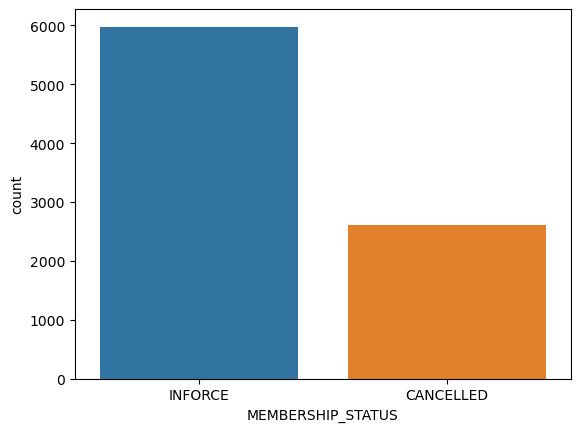

In [16]:
#Exploratory Data Analysis - Visualising the dataset to extract relevent features
sns.countplot(x='MEMBERSHIP_STATUS',data=data)
plt.show()

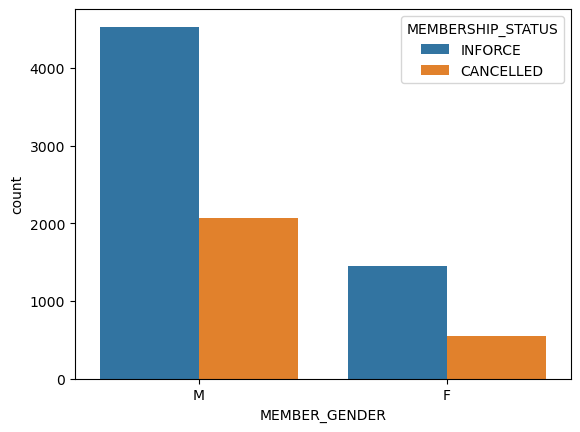

In [17]:
sns.countplot(x='MEMBER_GENDER', hue='MEMBERSHIP_STATUS', data=data)
plt.show()

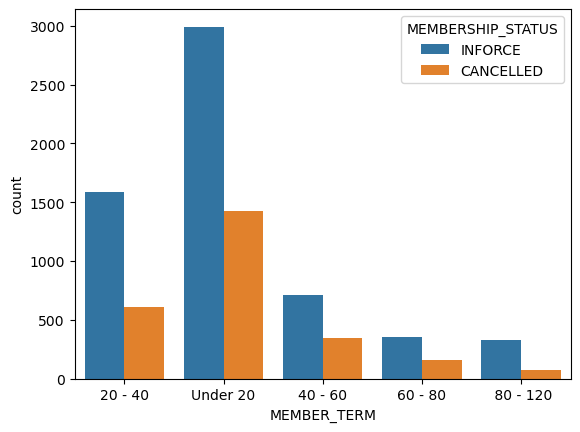

In [18]:
sns.countplot(x='MEMBER_TERM',hue='MEMBERSHIP_STATUS', data=data)
plt.show()

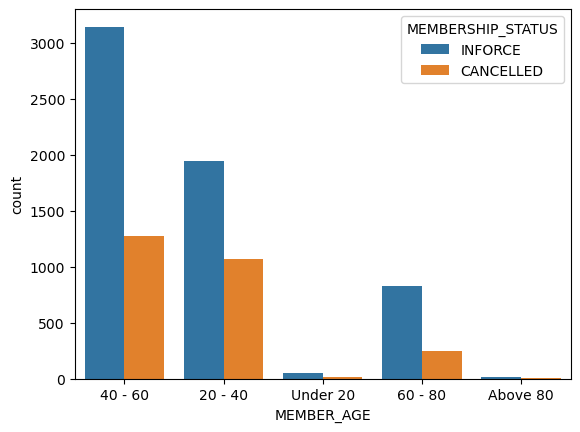

In [19]:
sns.countplot(x='MEMBER_AGE', hue='MEMBERSHIP_STATUS', data=data)
plt.show()

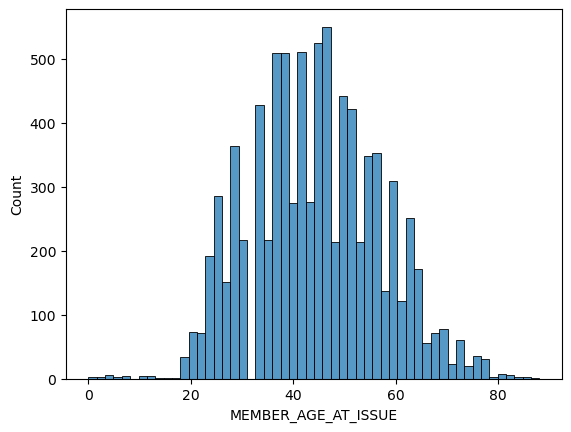

In [20]:
sns.histplot(x='MEMBER_AGE_AT_ISSUE', data=data)
plt.show()

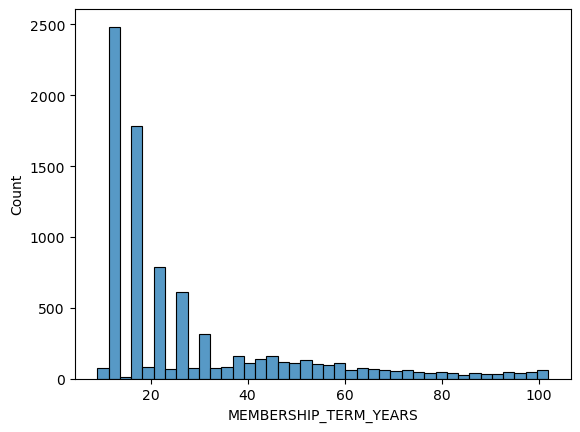

In [21]:
sns.histplot(x='MEMBERSHIP_TERM_YEARS', data=data)
plt.show()

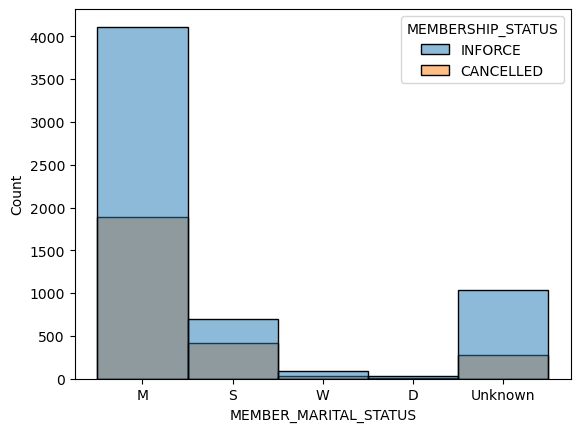

In [22]:
sns.histplot(x='MEMBER_MARITAL_STATUS', hue='MEMBERSHIP_STATUS', data=data)
plt.show()

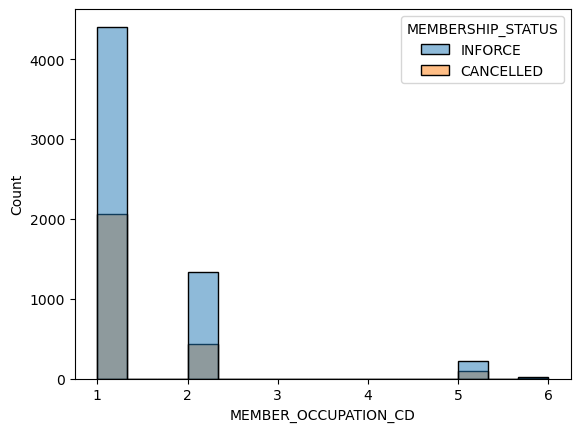

In [23]:
sns.histplot(x='MEMBER_OCCUPATION_CD', hue='MEMBERSHIP_STATUS',data=data)
plt.show()

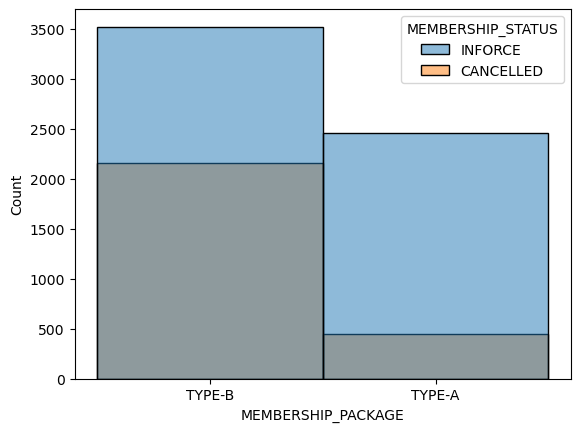

In [24]:
sns.histplot(x='MEMBERSHIP_PACKAGE', hue='MEMBERSHIP_STATUS', data=data)
plt.show()

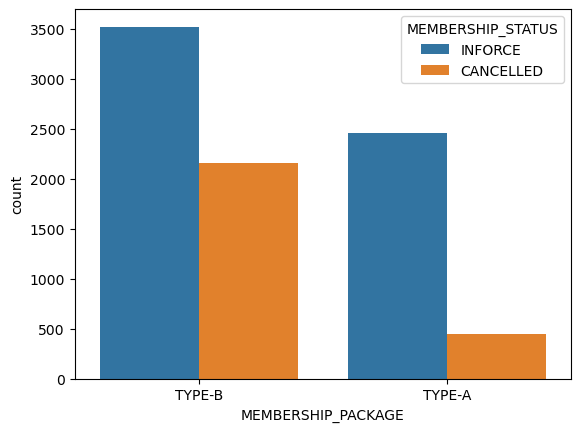

In [25]:
sns.countplot(x='MEMBERSHIP_PACKAGE', hue='MEMBERSHIP_STATUS', data=data)
plt.show()

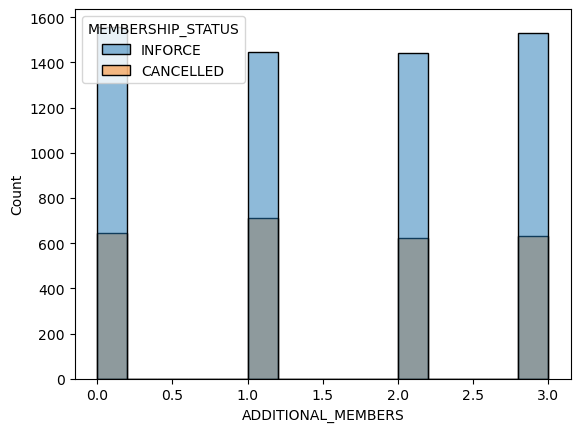

In [26]:
sns.histplot(x='ADDITIONAL_MEMBERS',hue='MEMBERSHIP_STATUS', data=data)
plt.show()

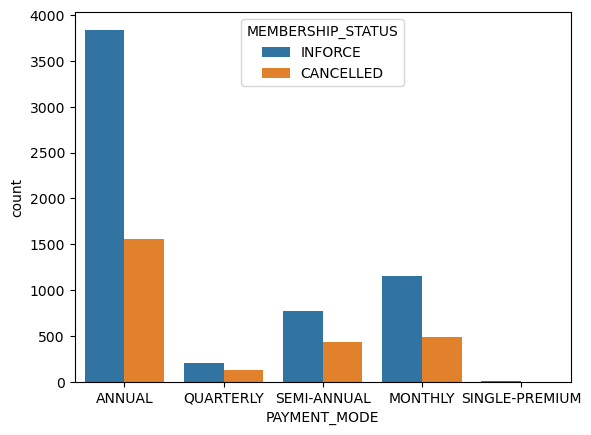

In [27]:
sns.countplot(x='PAYMENT_MODE', hue='MEMBERSHIP_STATUS',data=data)
plt.show()

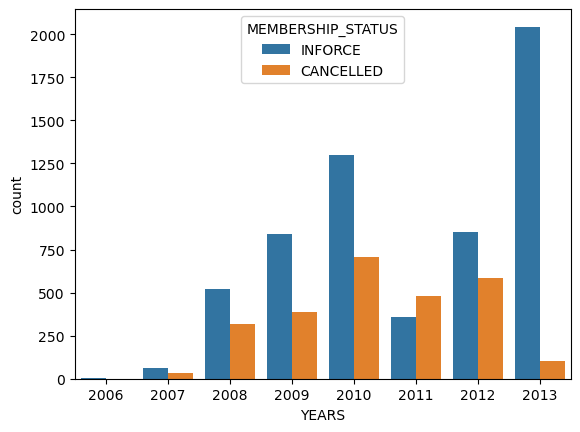

In [29]:
sns.countplot(x='YEARS', hue='MEMBERSHIP_STATUS', data=data)
plt.show()

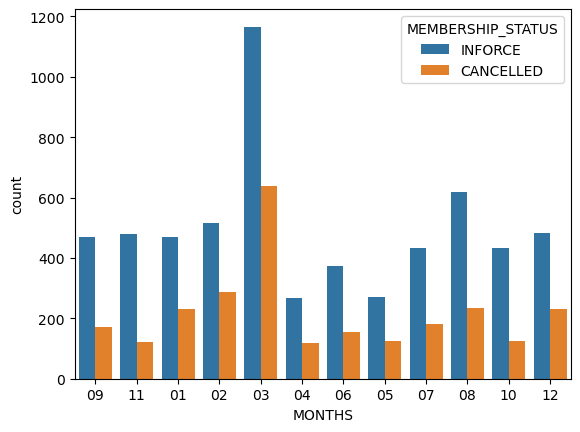

In [30]:
sns.countplot(x='MONTHS', hue='MEMBERSHIP_STATUS',data=data)
plt.show()

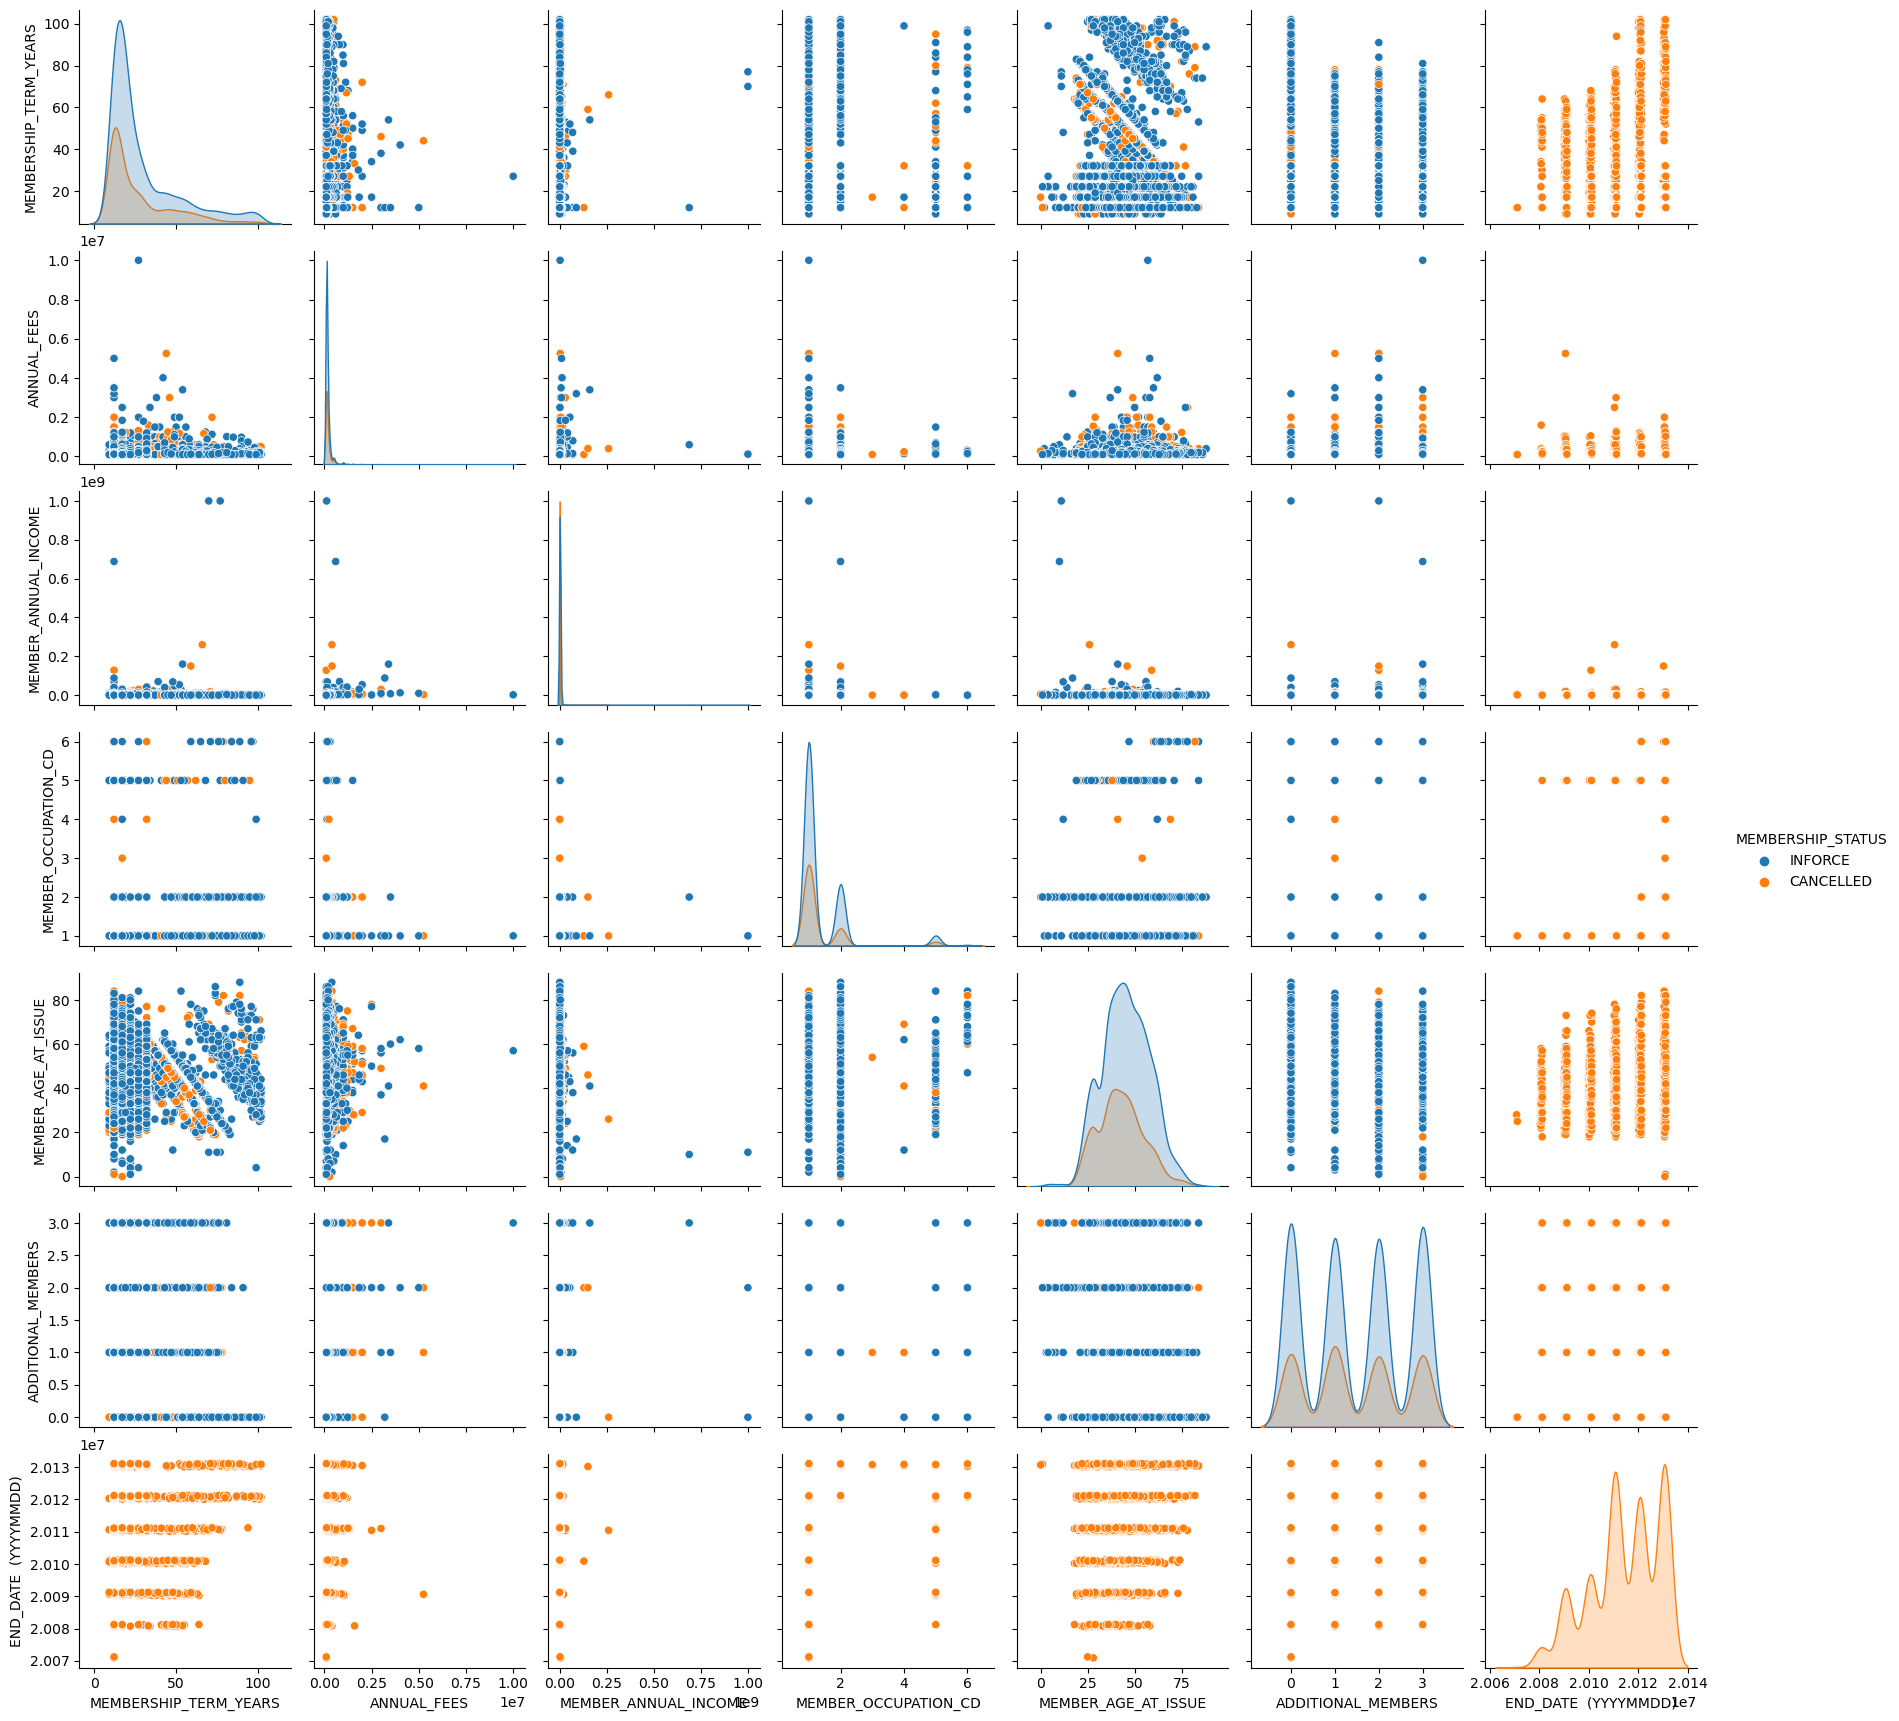

In [31]:
sns.pairplot(data, hue = 'MEMBERSHIP_STATUS')
plt.show()

In [ ]:
#all the above visualized graphs clearly depicts the most relevent features that directly contribute for prediction
# The Important Features for futher processing are: {Annual_fees, Marital_status, Gender, Annual_income, Occupation,
#            Membership_package, Payment_mode, Start_Year, Start_month, Age_group, Term_group, Result}                         

In [ ]:
#all the other irrelevent features are removed. 
#This includes such as: {Member_ID, Membership_term_years, Additional_Members, Agent_code, Start_Date
#            Membership_age_at_issue, End_date, Membership_status}

In [33]:
data.drop(columns=['MEMBERSHIP_NUMBER','MEMBERSHIP_TERM_YEARS','MEMBER_AGE_AT_ISSUE','ADDITIONAL_MEMBERS'],inplace=True)

In [34]:
data.drop(columns=['AGENT_CODE','MEMBERSHIP_STATUS','START_DATE (YYYYMMDD)','END_DATE  (YYYYMMDD)'],inplace=True)

In [35]:
#Thus the final revised dataset for fitting in the model is:
data.head()

,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,PAYMENT_MODE,YEARS,MONTHS,MEMBER_TERM,MEMBER_AGE,RESULT
0,113125.0,M,M,25200000.0,1.0,TYPE-B,ANNUAL,2006,09,20 - 40,40 - 60,No
1,112220.0,M,M,10339200.0,1.0,TYPE-B,QUARTERLY,2006,11,20 - 40,20 - 40,No
2,100000.0,M,M,14400000.0,1.0,TYPE-B,ANNUAL,2007,01,Under 20,40 - 60,No
3,100000.0,M,M,9000000.0,1.0,TYPE-B,ANNUAL,2007,01,Under 20,20 - 40,No
4,100000.0,M,M,4800000.0,1.0,TYPE-B,QUARTERLY,2007,01,40 - 60,20 - 40,No


In [36]:
#Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8589 entries, 0 to 10361
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ANNUAL_FEES            8589 non-null   float64
 1   MEMBER_MARITAL_STATUS  8589 non-null   object 
 2   MEMBER_GENDER          8589 non-null   object 
 3   MEMBER_ANNUAL_INCOME   8589 non-null   float64
 4   MEMBER_OCCUPATION_CD   8589 non-null   float64
 5   MEMBERSHIP_PACKAGE     8589 non-null   object 
 6   PAYMENT_MODE           8589 non-null   object 
 7   YEARS                  8589 non-null   object 
 8   MONTHS                 8589 non-null   object 
 9   MEMBER_TERM            8589 non-null   object 
 10  MEMBER_AGE             8589 non-null   object 
 11  RESULT                 8589 non-null   object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [38]:
data.shape #displays the total no of rows & columns

(8589, 12)

In [39]:
#checking for null values
data.isnull().sum()

ANNUAL_FEES              0
MEMBER_MARITAL_STATUS    0
MEMBER_GENDER            0
MEMBER_ANNUAL_INCOME     0
MEMBER_OCCUPATION_CD     0
MEMBERSHIP_PACKAGE       0
PAYMENT_MODE             0
YEARS                    0
MONTHS                   0
MEMBER_TERM              0
MEMBER_AGE               0
RESULT                   0
dtype: int64

In [41]:
# Encoding of our categorical features of dataset for fitting in the model
# Here, I made use of Label Encoder from sklearn python package

from sklearn import preprocessing

en = preprocessing.LabelEncoder()

In [42]:
data['MEMBER_MARITAL_STATUS'] = en.fit_transform(data['MEMBER_MARITAL_STATUS'])
data['MEMBER_GENDER']=en.fit_transform(data['MEMBER_GENDER'])
data['MEMBERSHIP_PACKAGE']=en.fit_transform(data['MEMBERSHIP_PACKAGE'])
data['PAYMENT_MODE']=en.fit_transform(data['PAYMENT_MODE'])
data['RESULT']=en.fit_transform(data['RESULT'])
data['MEMBER_TERM']=en.fit_transform(data['MEMBER_TERM'])
data['MEMBER_AGE']=en.fit_transform(data['MEMBER_AGE'])

 Importing the necessary Library for model fitting
 
 Here, I used Random Forest Classifier Algorithm for building the model
 
 Reason: 1) Random Forest Algorithm provides high accuracy comparetively than all the other algorithms.
         2) Forests generated can be saved and resued with other dataset, which is easy to work with.
         3) Overfitting of data is avoided.

In [43]:
# Importing the spliting model
from sklearn.model_selection import train_test_split

In [44]:
#Splitting the dataset into X,Y
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [46]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
#Creating a model
model = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth=15,
                                       n_estimators=100, oob_score=True)

In [48]:
#fitting a model with the Random Forest Classifier
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_jobs=-1, oob_score=True, random_state=0)

In [49]:
# Out-of-box score for the Random Forest Model
model.oob_score_

0.7319167515645466

In [50]:
#Testing the model with Test dataset
y_answer=model.predict(x_test)
print(y_answer)

[0 0 0 ... 0 0 1]


In [51]:
#Evaluting the model with the metrics
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_answer)
print(acc)
mat = confusion_matrix(y_test,y_answer)
print(mat)

0.7619324796274738
[[1116  105]
 [ 304  193]]


The dataset is initially preprocessed, visualized and the important features are selected based on the results, for futher processing of the process. The Revised Dataset is trained and tested using Random Forest Classifier Algorithm.

Hence the model is successfully trained and tested with Random Forest Algorithm. This model provided an accuracy rate of 76% which is quite acceptable. Thus, this model can predict the rate of customer membership cancellation with a standard accuracy rate of 75-80%, without overfitting or underfitting the given dataset. 